In [57]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'ace_tools'

In [6]:

demie_journée=6
absence=0
normal=8
# chargement des donnees 
df=pd.read_csv('../datas/data.csv')

# NETTOYAGE DES DONNEES 

# Les étapes suivantes ont été effectuées pour nettoyer les données :
# 1. Suppression des colonnes inutiles.
# 2. Nettoyage des valeurs dans la colonne 'Total présence'.
# 3. Suppression des lignes sans nom et avec 'Holiday' dans la colonne 'Horaire/Incidence'.
# 4. Traitement des colonnes d'entrée/sortie et conversion en format datetime.
# 5. Calcul du temps de présence et ajout d'une colonne 'Type'.
# Supprimer les colonnes 'Code', 'C.N.I.', 'pause' et toutes les colonnes commençant par 'Unnamed:'
colonnes_a_supprimer = ['Code', 'C.N.I.', 'pause'] + [col for col in df.columns if 'Unnamed' in col]
df.drop(columns=colonnes_a_supprimer, inplace=True)

# Remplacer les valeurs invalides par NaN et convertir en type float
df['Total présence'] = pd.to_numeric(df['Total présence'], errors='coerce')
# Suppression des lignes où 'Nom' est vide
df = df.dropna(subset=['Nom'])

# Suppression des lignes où 'Horaire/Incidence' est 'Holiday'
df = df[df['Horaire/Incidence'] != 'Holiday']
# Remplacement des valeurs manquantes dans les colonnes 'Entrée' et 'Sortie'
# Remplacement de 'Pointage manquant' par 0
df.replace({'Pointage manquant': '00:00'}, inplace=True)

# Conversion des colonnes en format datetime
cols_to_convert = ['Entrée', 'Sortie', 'Entrée.1', 'Sortie.1', 'Entrée.2', 'Sortie.2']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_datetime, format='%H:%M', errors='coerce')

# Conversion de la colonne 'Date'
df['Date'] = pd.to_datetime(df['Date'].str.split(' ').str[0], format='%d/%m/%Y')

# Extraction des premières et dernières heures d'entrée/sortie
# Extraction des premières et dernières heures d'entrée/sortie
df['Entrée'] = df[['Entrée', 'Entrée.1', 'Entrée.2']].min(axis=1)
df['Sortie'] = df[['Sortie', 'Sortie.1', 'Sortie.2']].max(axis=1)

# Suppression des colonnes supplémentaires
df = df.drop(columns=['Entrée.1', 'Sortie.1', 'Entrée.2', 'Sortie.2'])
# Calcul du nombre d'heures passées au bureau
df['Total présence'] = (df['Sortie'] - df['Entrée']).dt.total_seconds() / 3600
df['Total présence'].fillna(0, inplace=True)  # Remplace les valeurs manquantes par 0
# Création de la colonne 'Type'
# Ajoute une colonne Type pour classifier les enregistrements en fonction du temps de présence.

# Création de la colonne 'Type'
df['Type'] = 'retard'  # Par défaut, tout est 'retard'

# Mettre à jour les types en fonction de la colonne 'Total présence'
df.loc[df['Total présence'] == absence, 'Type'] = 'absence'
df.loc[df['Total présence'] < absence, 'Type'] = 'avertissement'
df.loc[(df['Total présence'] >= demie_journée) & (df['Total présence'] < 8), 'Type'] = 'demie journée'
df.loc[df['Total présence'] >= normal, 'Type'] = 'normal'



In [7]:

# chargement des donnees 
df1=pd.read_csv('../datas/data1.csv')

# NETTOYAGE DES DONNEES 

# Les étapes suivantes ont été effectuées pour nettoyer les données :
# 1. Suppression des colonnes inutiles.
# 2. Nettoyage des valeurs dans la colonne 'Total présence'.
# 3. Suppression des lignes sans nom et avec 'Holiday' dans la colonne 'Horaire/Incidence'.
# 4. Traitement des colonnes d'entrée/sortie et conversion en format datetime.
# 5. Calcul du temps de présence et ajout d'une colonne 'Type'.
# Supprimer les colonnes 'Code', 'C.N.I.', 'pause' et toutes les colonnes commençant par 'Unnamed:'
colonnes_a_supprimer = ['Code', 'C.N.I.', 'pause'] + [col for col in df1.columns if 'Unnamed' in col]
df1.drop(columns=colonnes_a_supprimer, inplace=True)

# Remplacer les valeurs invalides par NaN et convertir en type float
df1['Total présence'] = pd.to_numeric(df1['Total présence'], errors='coerce')
# Suppression des lignes où 'Nom' est vide
df1 = df1.dropna(subset=['Nom'])

# Suppression des lignes où 'Horaire/Incidence' est 'Holiday'
df1 = df1[df1['Horaire/Incidence'] != 'Holiday']
# Remplacement des valeurs manquantes dans les colonnes 'Entrée' et 'Sortie'
# Remplacement de 'Pointage manquant' par 0
df1.replace({'Pointage manquant': '00:00'}, inplace=True)

# Conversion des colonnes en format datetime
cols_to_convert = ['Entrée', 'Sortie', 'Entrée.1', 'Sortie.1', 'Entrée.2', 'Sortie.2']
df1[cols_to_convert] = df1[cols_to_convert].apply(pd.to_datetime, format='%H:%M', errors='coerce')

# Conversion de la colonne 'Date'
df1['Date'] = pd.to_datetime(df1['Date'].str.split(' ').str[0], format='%d/%m/%Y')

# Extraction des premières et dernières heures d'entrée/sortie
# Extraction des premières et dernières heures d'entrée/sortie
df1['Entrée'] = df1[['Entrée', 'Entrée.1', 'Entrée.2']].min(axis=1)
df1['Sortie'] = df1[['Sortie', 'Sortie.1', 'Sortie.2']].max(axis=1)

# Suppression des colonnes supplémentaires
df1 = df1.drop(columns=['Entrée.1', 'Sortie.1', 'Entrée.2', 'Sortie.2'])
# Calcul du nombre d'heures passées au bureau
df1['Total présence'] = (df1['Sortie'] - df1['Entrée']).dt.total_seconds() / 3600
df1['Total présence'].fillna(0, inplace=True)  # Remplace les valeurs manquantes par 0
# Création de la colonne 'Type'
# Ajoute une colonne Type pour classifier les enregistrements en fonction du temps de présence.

# Création de la colonne 'Type'
df1['Type'] = 'retard'  # Par défaut, tout est 'retard'

# Mettre à jour les types en fonction de la colonne 'Total présence'
df1.loc[df1['Total présence'] == absence, 'Type'] = 'absence'
df1.loc[df1['Total présence'] < absence, 'Type'] = 'avertissement'
df1.loc[(df1['Total présence'] >= demie_journée) & (df1['Total présence'] < 8), 'Type'] = 'demie journée'
df1.loc[df1['Total présence'] >= normal, 'Type'] = 'normal'



In [8]:
# on concatene les 2 dataset
# Concaténation horizontale
df = pd.concat([df, df1], axis=0, ignore_index=True)


In [9]:
##On enregistre le dataset propre 
# df.to_csv('../datas/cleanData.csv', index=False)



# Rapport d'Analyse des Données de Pointage
## Introduction
Nous allons analyser un dataset contenant des informations sur la présence des employés d'une organisation. Ce df comprend 2679 enregistrements et 13 colonnes avec des informations telles que le nom de l'employé, son service, sa direction, les heures d'entrée et de sortie, ainsi que la durée de présence.



In [11]:


# ## Intervalle de Dates dans le df
start_date = df['Date'].min()
end_date = df['Date'].max()
print(f"Le dataset couvre la période du {start_date} au {end_date}.")




Le dataset couvre la période du 2024-05-24 00:00:00 au 2024-07-31 00:00:00.


In [36]:
# Supprimer les lignes où df['SERVICE:'] est égal à 'Cabinet'
df = df.loc[df['SERVICE:'] != 'Cabinet']


Cette période nous permettra d'analyser les comportements de présence sur une semaine de travail

## Répartition Globale des Types de Journée
Cette section explore la répartition générale des types de journée, incluant les journées normales, les retards, les demi-journées, et les absences. Chaque type est représenté par un graphique à barres, indiquant clairement le nombre d'employés pour chaque catégorie.



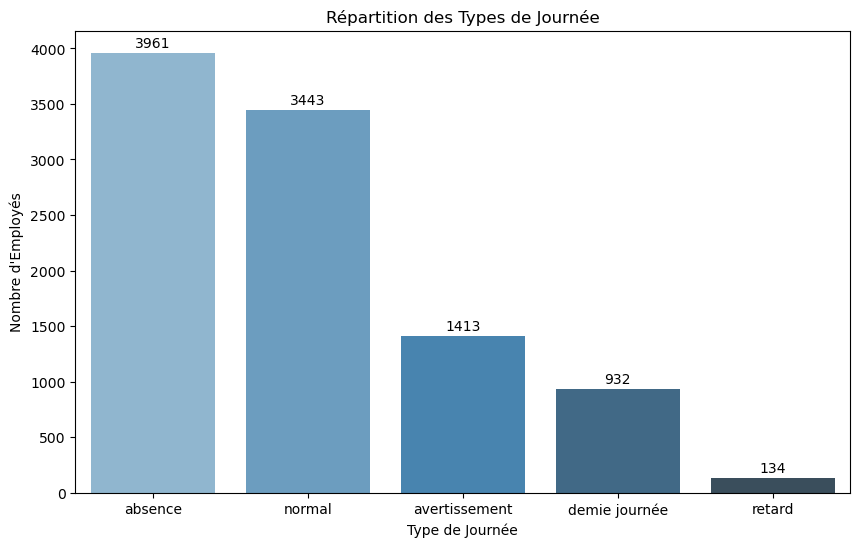

In [37]:
# ## Analyse Globale des Types de Journée
plt.figure(figsize=(10, 6))
type_counts = df['Type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Blues_d')
plt.title("Répartition des Types de Journée")
plt.xlabel("Type de Journée")
plt.ylabel("Nombre d'Employés")
for i in range(len(type_counts)):
    plt.text(i, type_counts.values[i] + 50, str(type_counts.values[i]), ha='center')
plt.show()

## Tendance Mensuelle des Présences et Retards

Ce graphique montre l'évolution des pointages par mois pour les différents types (présence normale, retard, absence, etc.). Cela nous permet d'identifier les mois où il y a eu des pics d'absences ou de retards.



<Figure size 1200x700 with 0 Axes>

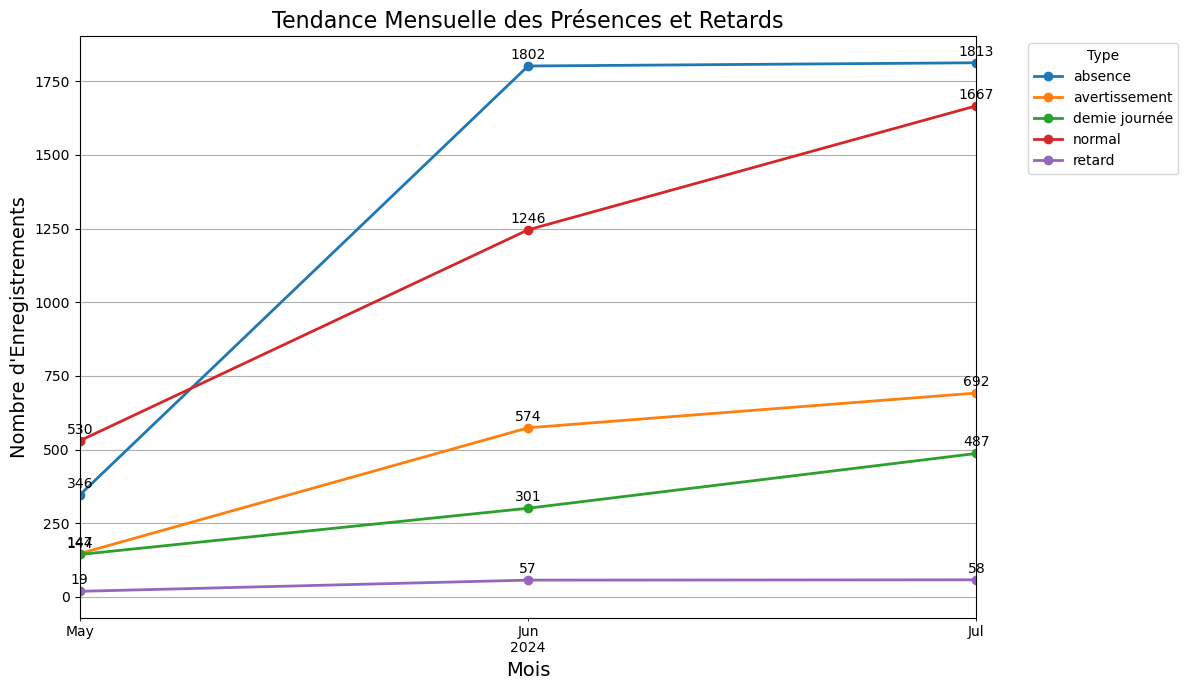

In [52]:
# Group by month and calculate trends
df['Month'] = df['Date'].dt.to_period('M')

# Calculate monthly counts for 'Type' categories
monthly_trends = df.groupby(['Month', 'Type']).size().unstack(fill_value=0)

# Plotting the trends
plt.figure(figsize=(12, 7))
ax = monthly_trends.plot(kind='line', marker='o', figsize=(12, 7), linewidth=2)

# Add title and labels
plt.title('Tendance Mensuelle des Présences et Retards', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Nombre d\'Enregistrements', fontsize=14)

# Add a grid for better readability
plt.grid(True)

# Annotate each point with the exact value
for line in ax.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{int(y)}"
        if y > 0:  # Only annotate points with values greater than 0
            ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

# Show the legend outside the plot
ax.legend(title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to ensure the legend does not overlap
plt.tight_layout()

# Show the plot
plt.show()



## Classement Complet des Employés Basé sur les Retards

Dans cette section, nous classons tous les employés en fonction du nombre de retards accumulés. Ce classement affiche le nom de l'employé, sa direction, son service, ainsi que le nombre total de retards.


In [62]:
# Filter the data for 'retard' only
retard_df = df[df['Type'] == 'retard']

# Group by employee name, direction, and service, and count occurrences of 'retard'
ranking_retard = retard_df.groupby(['Nom', 'DIRECTION:', 'SERVICE:']).size().reset_index(name='Total_Retard')

# Sort the ranking by total retards in descending order
ranking_retard_sorted = ranking_retard.sort_values(by='Total_Retard', ascending=False)

# Display the full ranking for retards
import pandas as pd
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Show the sorted ranking for retards
ranking_retard_sorted


,Nom,DIRECTION:,SERVICE:,Total_Retard
63,Salimata Ndoffene DIOUF,CABINET,COORD CELLULE,6
37,Mame Bara THIAM,DSI,DARSE,6
64,Sangone DIOP,DSI,DARSE,6
1,Abdou Lahat DIOUF,DGC,DPR,5
7,Amadou Legrand DIOP,DGC,DENS,5
46,Mouhamed DIALLO,DGC,DPR,4
48,Ndeye Yaram NDIAYE,DSI,DAQES,4
53,Omar Marie NDAO,CABINET,SRPD,4
9,Aminata Diagne LO,DELC,delc,4
65,Seynabou NDOYE,DGC,DPR,4


## Classement Complet des Employés Basé sur les Absences

Cette section présente le classement des employés en fonction du nombre d'absences. Pour chaque employé, vous trouverez son nom, sa direction, son service, ainsi que le nombre total d'absences enregistrées.


In [64]:
# Filter the data for 'absence' only
absence_df = df[df['Type'] == 'absence']

# Group by employee name, direction, and service, and count occurrences of 'absence'
ranking_absence = absence_df.groupby(['Nom', 'DIRECTION:', 'SERVICE:']).size().reset_index(name='Total_Absence')

# Sort the ranking by total absences in descending order
ranking_absence_sorted = ranking_absence.sort_values(by='Total_Absence', ascending=False)

# Display the full ranking for absences
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Show the sorted ranking for absences
ranking_absence_sorted


,Nom,DIRECTION:,SERVICE:,Total_Absence
96,Ismaila SYLLA,DGC,DFONCTIONNAIRES,53
84,Hamad FAYE,DELC,delc,49
122,Mame Léna FALL,DGC,DNFONCTIONNAIRES,49
156,Ndéye Bineta NDIAYE,DGFP,VISA,49
30,Amath SALL,DSI,dsi,49
85,Hamadou Bamba,DGFP,VISA,49
44,Bassirou MBOUP,DGC,dgc,49
145,Ndeye Amie NDAO,DGC,dgc,49
49,Bineta Sylla TALL,DGFP,VISA,49
142,Moussa DIAGNE,DGFP,BLIAISON,49


Les classements ci-dessus vous montrent, dans un ordre décroissant, les employés avec le plus grand nombre de retards et d'absences. Chaque tableau présente les employés avec leur nom, leur direction, leur service, et le nombre total de retards ou d'absences.


## Liste des Employés Pointant Après 8h

Cette section liste tous les employés ayant pointé après 8 heures du matin. Nous calculons également le pourcentage d'employés qui arrivent après cette heure, ce qui peut indiquer des habitudes de retard généralisées.


In [71]:
# Ensure the 'Entrée' column is in datetime format, if not already
df['Entrée'] = pd.to_datetime(df['Entrée'], format='%H:%M', errors='coerce')

# Filter employees who check in after 8 AM
df['After_8'] = df['Entrée'].apply(lambda x: x.hour >= 8 if pd.notnull(x) else False)

# Group by employee name, direction, and service for those checking in after 8 AM
late_checkins = df[df['After_8']].groupby(['Nom', 'DIRECTION:', 'SERVICE:']).size().reset_index(name='Total_Checkins_After_8')

# Sort by the number of late check-ins in descending order
late_checkins_sorted = late_checkins.sort_values(by='Total_Checkins_After_8', ascending=False)

# Calculate the percentage of employees checking in after 8 AM
total_employees = df['Nom'].nunique()
total_late_employees = late_checkins_sorted['Nom'].nunique()
percentage_late = (total_late_employees / total_employees) * 100

# Display the full list and percentage

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Display results
print(f"\nPourcentage d'employés qui se présentent après 8 heures du matin : {percentage_late:.2f}%")
print("Les employés qui se présentent après 8 heures du matin :")

late_checkins_sorted




Pourcentage d'employés qui se présentent après 8 heures du matin : 83.90%
Les employés qui se présentent après 8 heures du matin :


,Nom,DIRECTION:,SERVICE:,Total_Checkins_After_8
47,Cheikh Mbaye NDIAYE,SG,courrier,47
82,Ismaila SYLLA,DGC,DFONCTIONNAIRES,45
135,Omar SALL,DAGE,dage,45
118,Mouhamed DIALLO,DGC,DPR,43
154,Seynabou NDOYE,DGC,DPR,43
122,Ndeye Awa NDIAYE,DGC,dgc,43
20,Alassane KANTE,DGC,DPR,42
94,Mamadou Nana SARR,DSI,DAQES,42
1,Abasse DIOUF,DGPEEC,dgpeec,42
96,Mamadou SENE,DGC,DENS,41


## Tendance Mensuelle des Absences

Le graphique ci-dessous montre la tendance mensuelle des absences, permettant de visualiser les mois où les absences ont été particulièrement élevées.




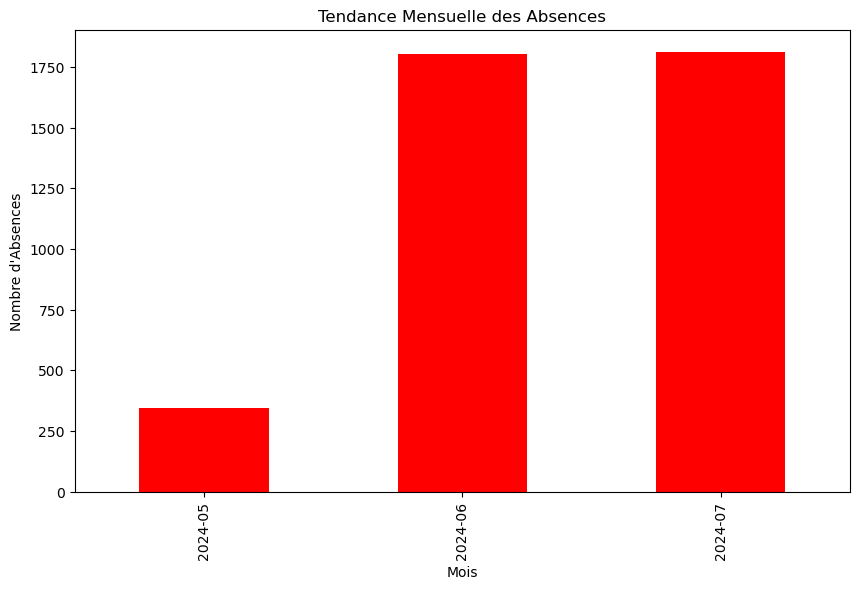

In [49]:
# Absence trend over months
absence_trends = df[df['Type'] == 'absence'].groupby('Month').size()

# Plot absence trends
plt.figure(figsize=(10, 6))
absence_trends.plot(kind='bar', color='red')
plt.title('Tendance Mensuelle des Absences')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'Absences')
plt.show()

### Top 10 des Employés les Plus Absentéistes

Voici le classement des employés ayant eu le plus grand nombre d'absences. Cela nous aide à identifier les employés ayant un historique d'absences répétées.

In [72]:
# Rank employees with most absences
absence_ranking = df[df['Type'] == 'absence'].groupby('Nom').size().sort_values(ascending=False)

# Display top 10 employees with most absences
top_10_absentees = absence_ranking.head(10)
print("Top 10 Employees with Most Absences:")
print(top_10_absentees)

Top 10 Employees with Most Absences:
Nom
Ismaila SYLLA          53
Hamadou Bamba          49
Mame Léna FALL         49
Ndéye Bineta NDIAYE    49
Amath SALL             49
Helene SOW             49
Bassirou MBOUP         49
Ndeye Amie NDAO        49
Bineta Sylla TALL      49
Moussa DIAGNE          49
dtype: int64


## Top 5 des Employés avec la Meilleure Présence
Nous avons identifié les cinq employés ayant le plus de présence au bureau. Ce classement est utile pour reconnaître les employés les plus assidus.


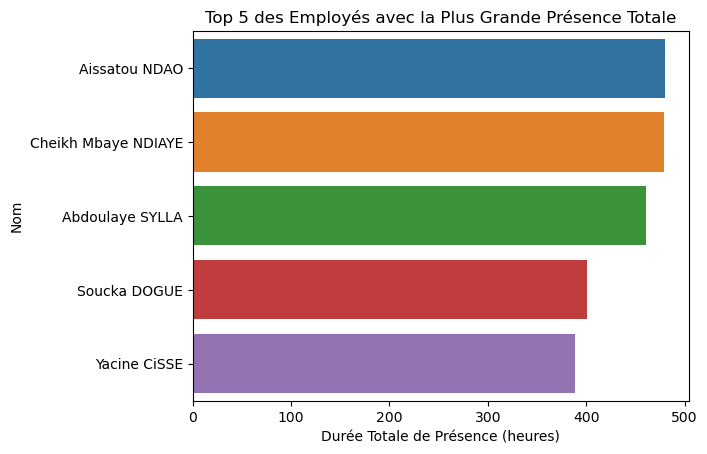

In [39]:
# Calcul de la durée totale de présence par employé
total_presence_per_employee = df.groupby('Nom')['Total présence'].sum()

# Top 5 des employés
top_5_employees = total_presence_per_employee.nlargest(5)

# Visualisation
sns.barplot(x=top_5_employees.values, y=top_5_employees.index)
plt.title('Top 5 des Employés avec la Plus Grande Présence Totale')
plt.xlabel('Durée Totale de Présence (heures)')
plt.ylabel('Nom')
plt.show()

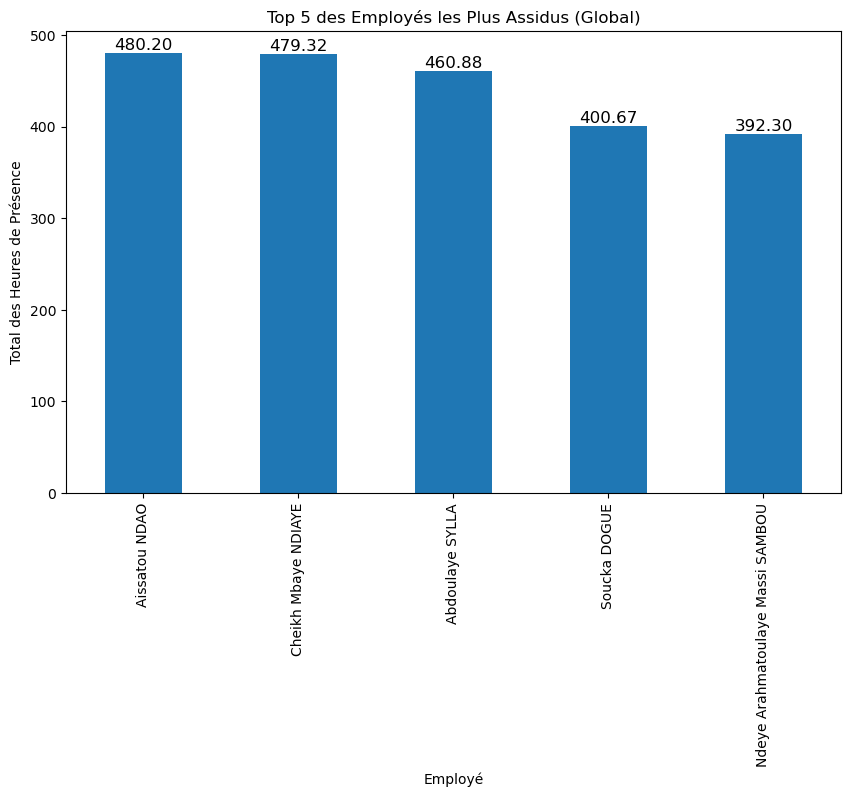

In [14]:
top_5_global = df.groupby('Nom')['Total présence'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_global.plot(kind='bar')
plt.title("Top 5 des Employés les Plus Assidus (Global)")
plt.xlabel("Employé")
plt.ylabel("Total des Heures de Présence")
for idx, value in enumerate(top_5_global):
    plt.text(idx, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()

## Top 5 par Direction
Nous allons  identifier les 5 directions où la présence moyenne est la plus élevée.

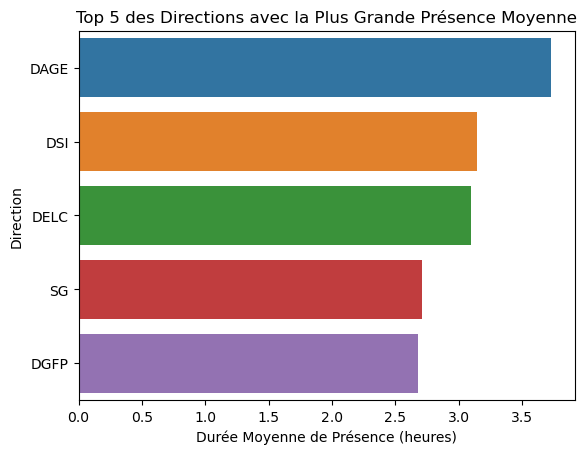

In [15]:
# Calcul de la durée moyenne de présence par direction
average_presence_per_direction = df.groupby('DIRECTION:')['Total présence'].mean()

# Top 5 des directions
top_5_directions = average_presence_per_direction.nlargest(5)

# Visualisation
sns.barplot(x=top_5_directions.values, y=top_5_directions.index)
plt.title('Top 5 des Directions avec la Plus Grande Présence Moyenne')
plt.xlabel('Durée Moyenne de Présence (heures)')
plt.ylabel('Direction')
plt.show()

## Top 5 des Employés par Direction
Nous avons  classé les cinq meilleurs employés pour chaque direction. Cette analyse permet de comparer la performance des employés au sein de chaque direction.


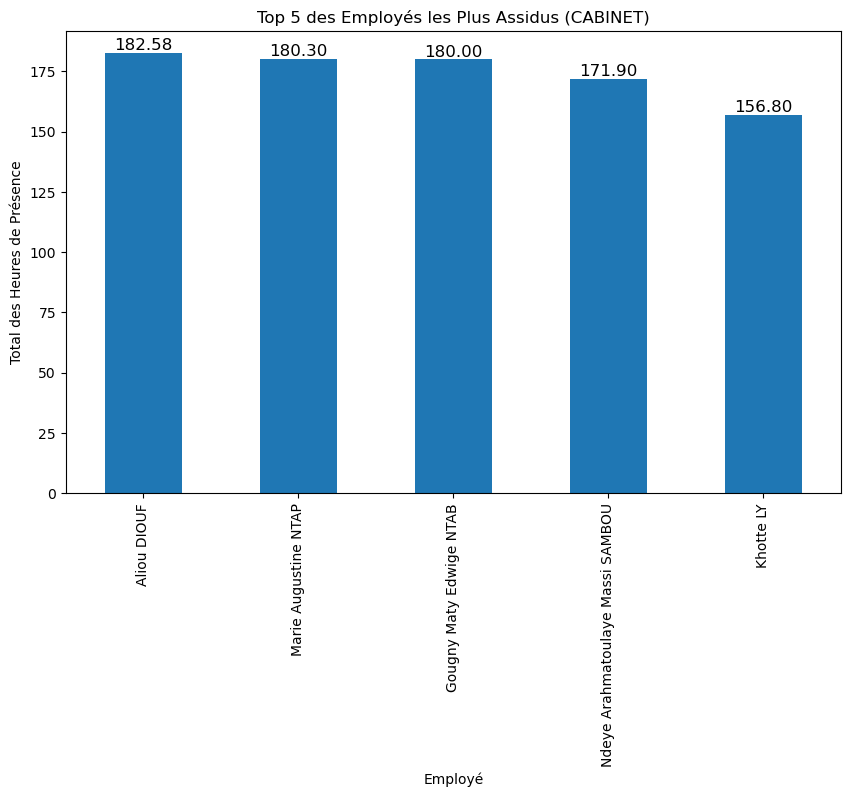

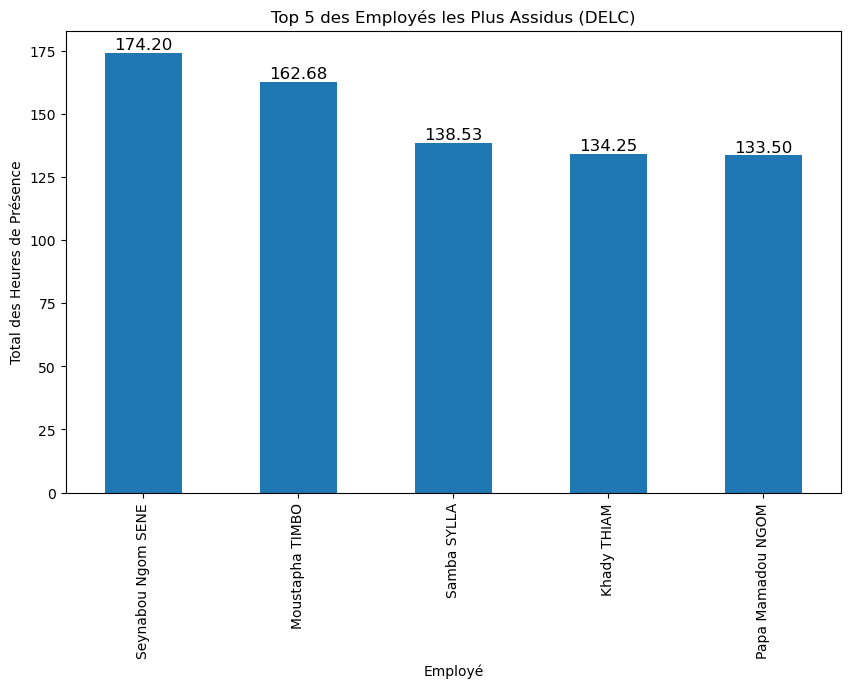

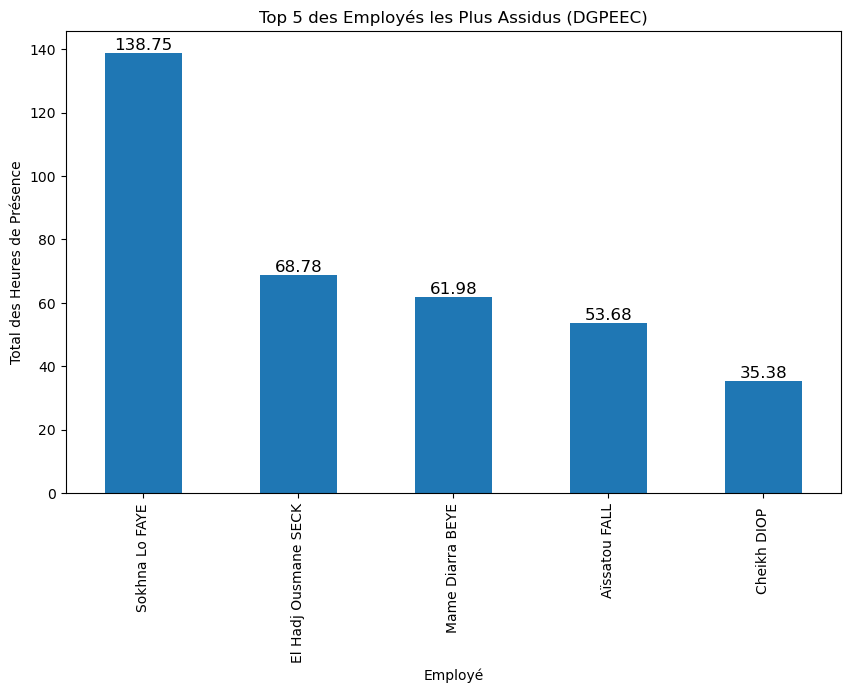

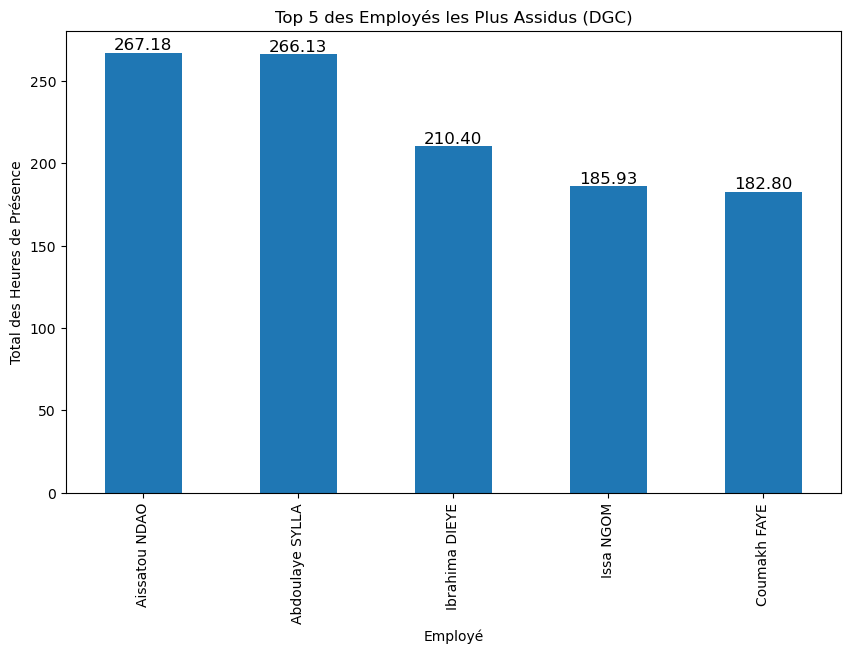

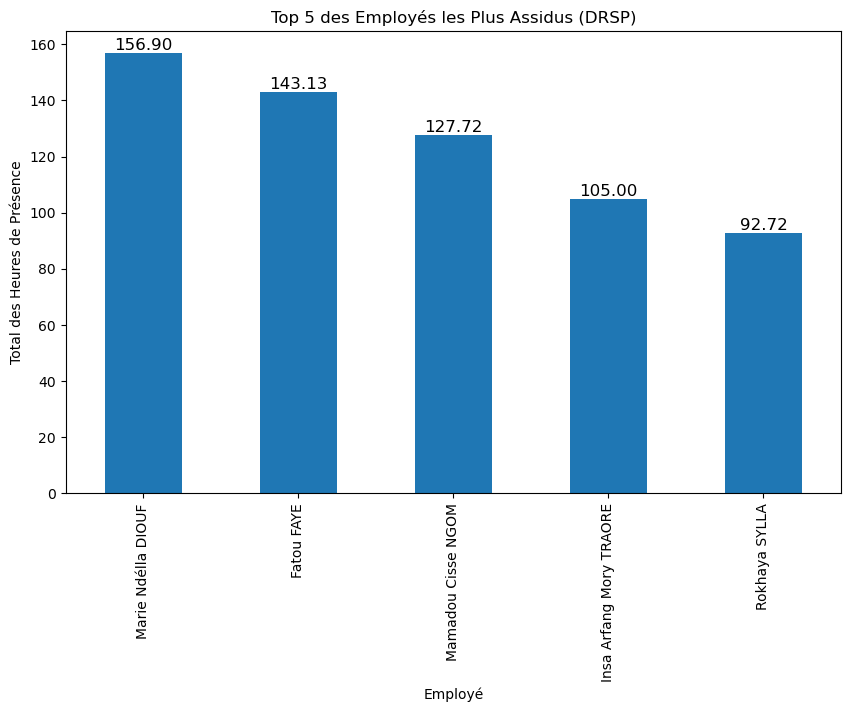

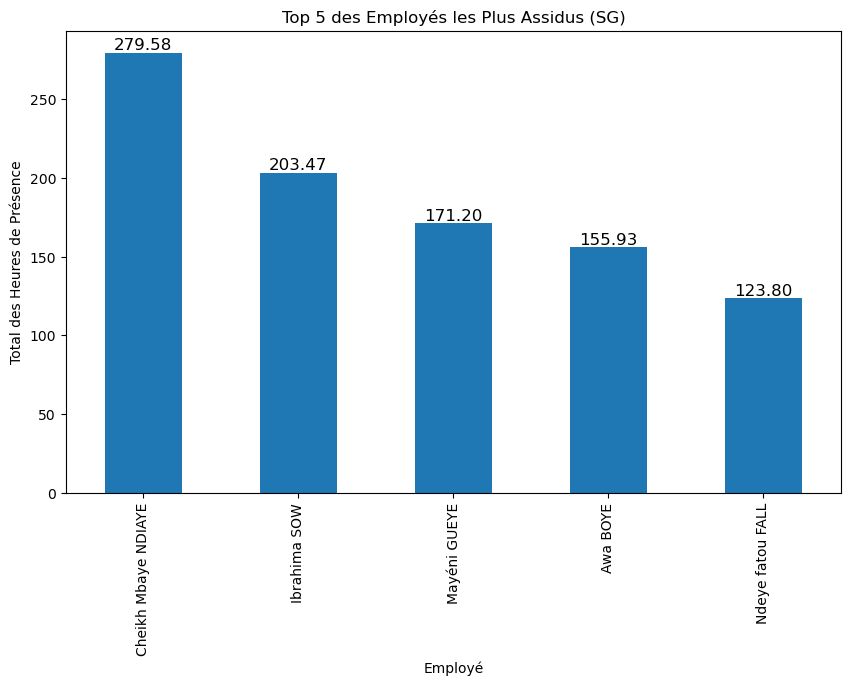

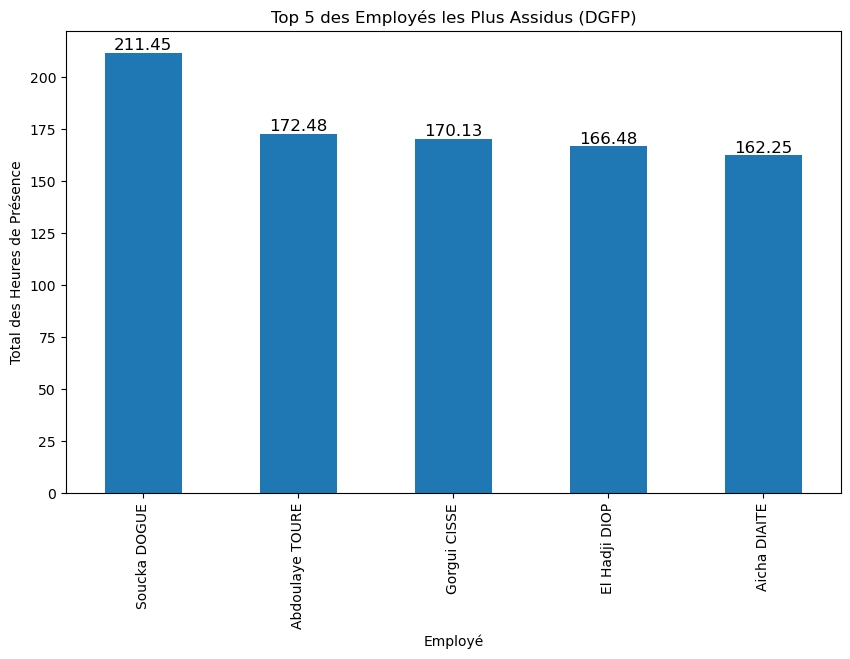

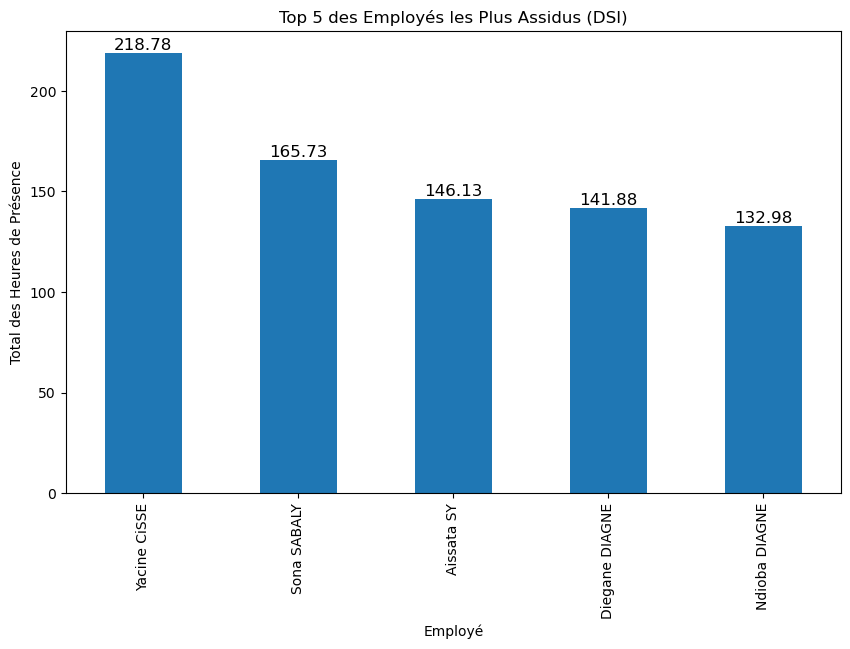

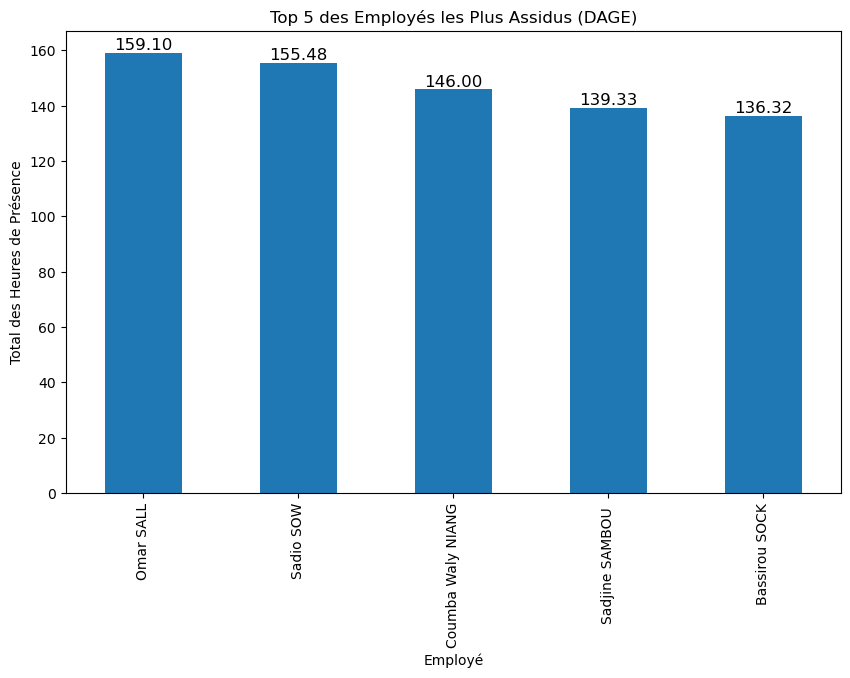

In [8]:
# ## Top 5 par Direction
directions = df['DIRECTION:'].unique()
for direction in directions:
    top_5_direction = df[df['DIRECTION:'] == direction].groupby('Nom')['Total présence'].sum().nlargest(5)
    plt.figure(figsize=(10, 6))
    top_5_direction.plot(kind='bar')
    plt.title(f"Top 5 des Employés les Plus Assidus ({direction})")
    plt.xlabel("Employé")
    plt.ylabel("Total des Heures de Présence")
    for idx, value in enumerate(top_5_direction):
        plt.text(idx, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12)
    plt.show()


## Analyse par Date
Nous allons maintenant analyser la présence des employés par date pour voir comment la présence évolue au cours de la semaine. Cela nous permettra de détecter des patterns, tels que des pics de présence en début ou en fin de semain

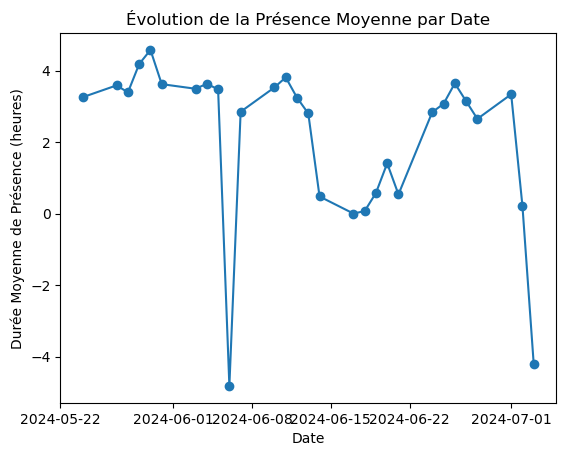

In [9]:
daily_presence = df.groupby('Date')['Total présence'].mean()

# Visualisation
plt.plot(daily_presence.index, daily_presence.values, marker='o')
plt.title('Évolution de la Présence Moyenne par Date')
plt.xlabel('Date')
plt.ylabel('Durée Moyenne de Présence (heures)')
plt.show()

Cette courbe d'évolution montre comment la durée totale de présence des employés change chaque jour. Elle peut révéler des tendances telles que des présences plus longues ou plus courtes selon les jours de la semaine.

## Analyse par Service
L'analyse par service met en lumière les différences entre les services en termes de types de journée observés.


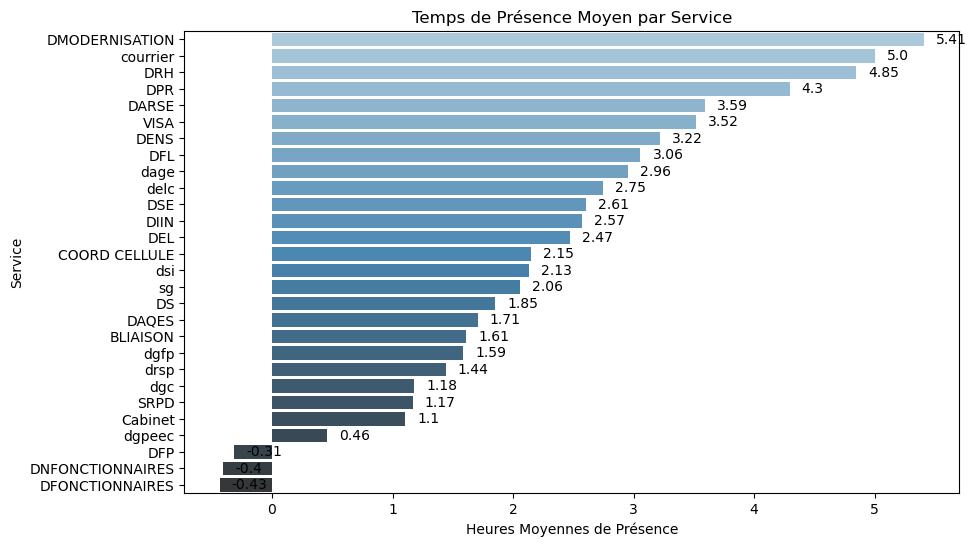

In [10]:
avg_presence_by_service = df.groupby('SERVICE:')['Total présence'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_presence_by_service.values, y=avg_presence_by_service.index, palette='Blues_d')
plt.title("Temps de Présence Moyen par Service")
plt.xlabel("Heures Moyennes de Présence")
plt.ylabel("Service")
for i in range(len(avg_presence_by_service)):
    plt.text(avg_presence_by_service.values[i] + 0.1, i, str(round(avg_presence_by_service.values[i], 2)), va='center')
plt.show()


## Analyse des Retards
Une analyse spécifique des retards est réalisée par service pour identifier les services les plus touchés.


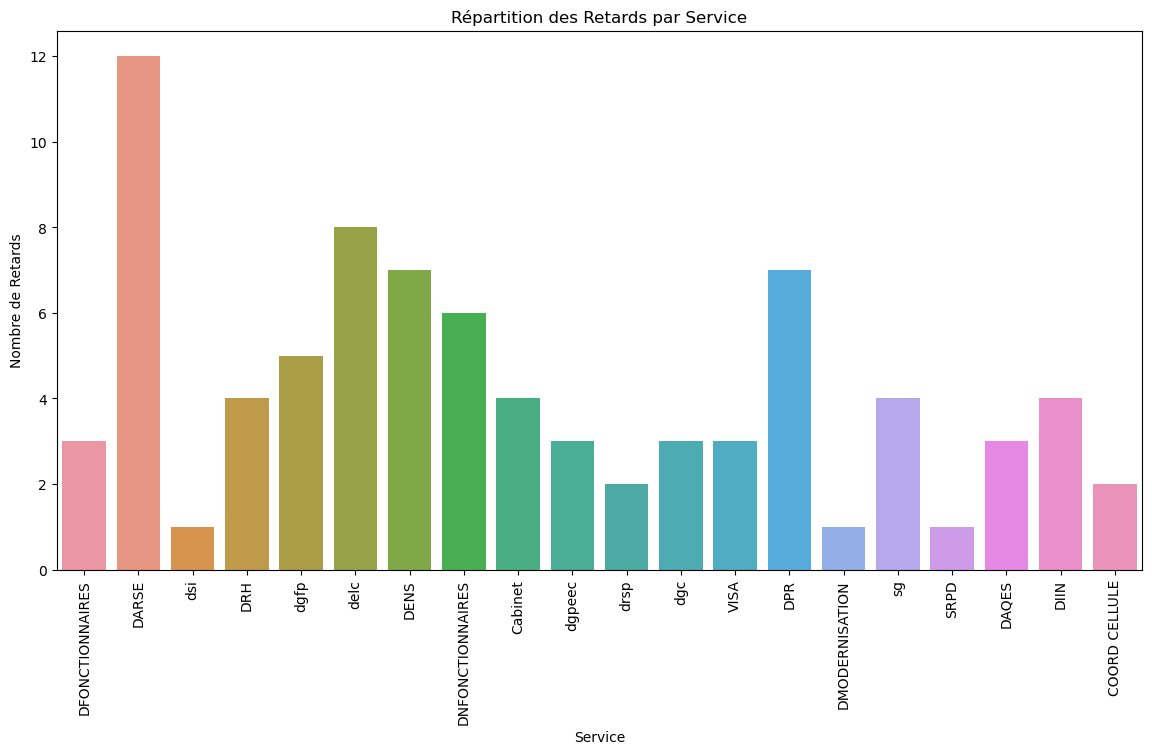

In [11]:

# ## Analyse des Retards
# Répartition des retards par service
plt.figure(figsize=(14, 7))
sns.countplot(data=df[df['Type'] == 'retard'], x='SERVICE:')
plt.title("Répartition des Retards par Service")
plt.xlabel("Service")
plt.ylabel("Nombre de Retards")
plt.xticks(rotation=90)
plt.show()

- **Analyse des Types de Journée par Jour de la Semaine** : Cette analyse examine comment les types de journée varient en fonction du jour de la semaine.


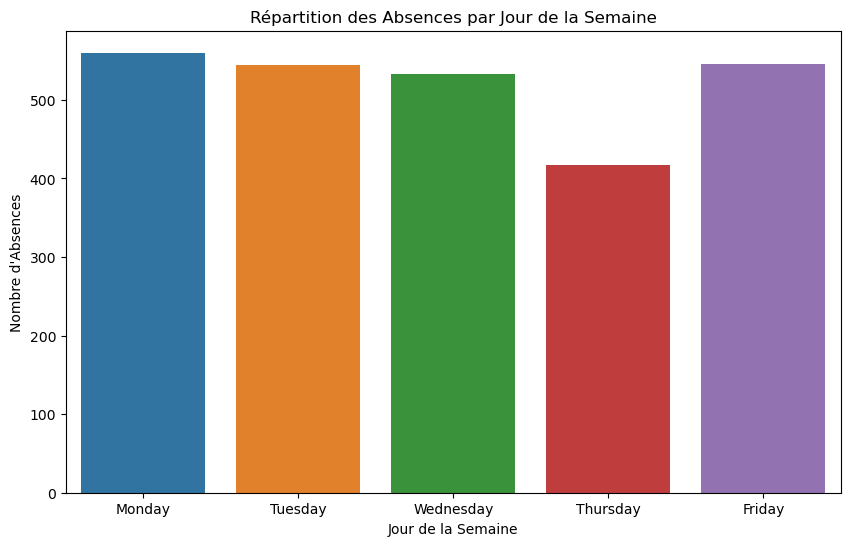

In [12]:
# Analyse des absences par jour de la semaine
df['Day_of_Week'] = df['Date'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Type'] == 'absence'], x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title("Répartition des Absences par Jour de la Semaine")
plt.xlabel("Jour de la Semaine")
plt.ylabel("Nombre d'Absences")
plt.show()

**Temps de Présence Moyen par Jour de la Semaine** : Ce graphique montre les jours où les employés sont les plus présents au bureau.


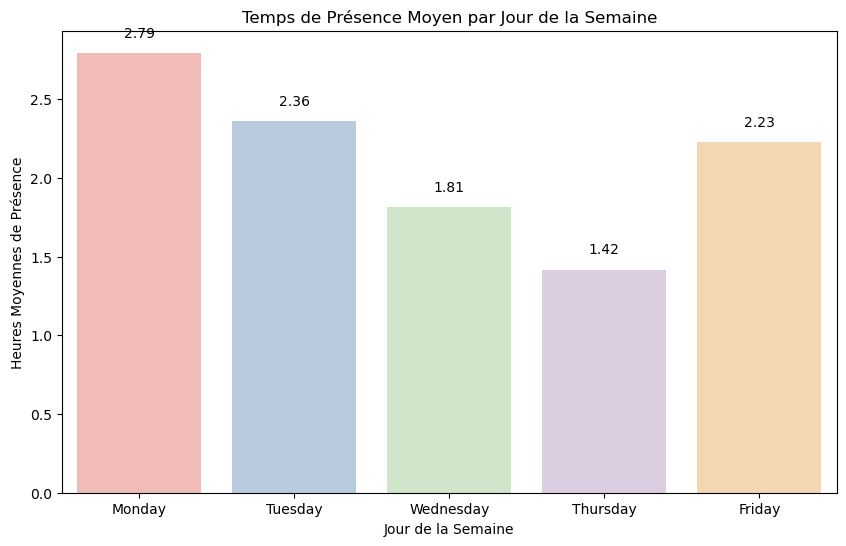

In [13]:
# Analyse de la présence moyenne par jour de la semaine
avg_presence_by_day = df.groupby('Day_of_Week')['Total présence'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_presence_by_day.index, y=avg_presence_by_day.values, palette='Pastel1')
plt.title("Temps de Présence Moyen par Jour de la Semaine")
plt.xlabel("Jour de la Semaine")
plt.ylabel("Heures Moyennes de Présence")
for i in range(len(avg_presence_by_day)):
    plt.text(i, avg_presence_by_day.values[i] + 0.1, str(round(avg_presence_by_day.values[i], 2)), ha='center')
plt.show()

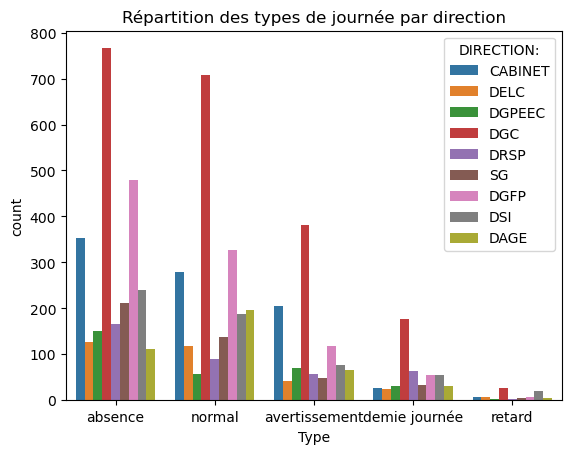

In [14]:
# Répartition des types de journée par direction
sns.countplot(data=df, x='Type', hue='DIRECTION:')
plt.title("Répartition des types de journée par direction")
plt.show()


## Analyse par Heure d'Entrée et de Sortie
Explorer les heures d'entrée et de sortie pour voir s'il y a des pics spécifiques, ce qui pourrait indiquer des périodes de pointe pour les arrivées ou les départs.

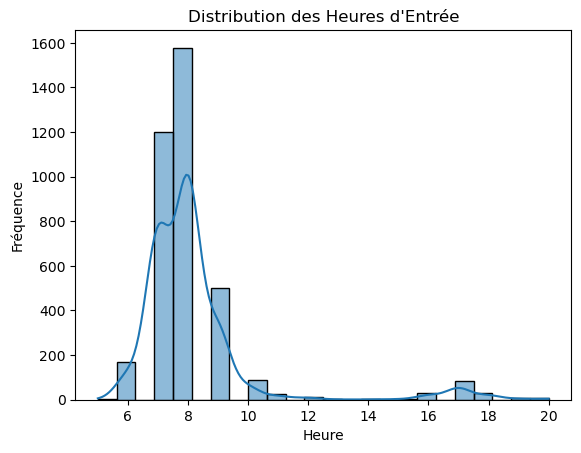

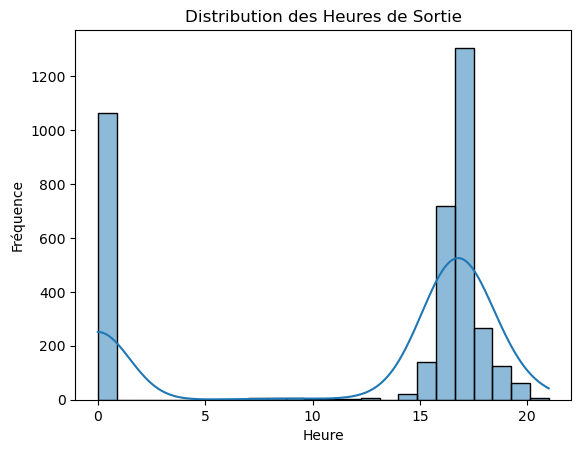

In [15]:
sns.histplot(df['Entrée'].dt.hour, kde=True, bins=24)
plt.title('Distribution des Heures d\'Entrée')
plt.xlabel('Heure')
plt.ylabel('Fréquence')
plt.show()

sns.histplot(df['Sortie'].dt.hour, kde=True, bins=24)
plt.title('Distribution des Heures de Sortie')
plt.xlabel('Heure')
plt.ylabel('Fréquence')
plt.show()


Analyse de l'Impact des Retards

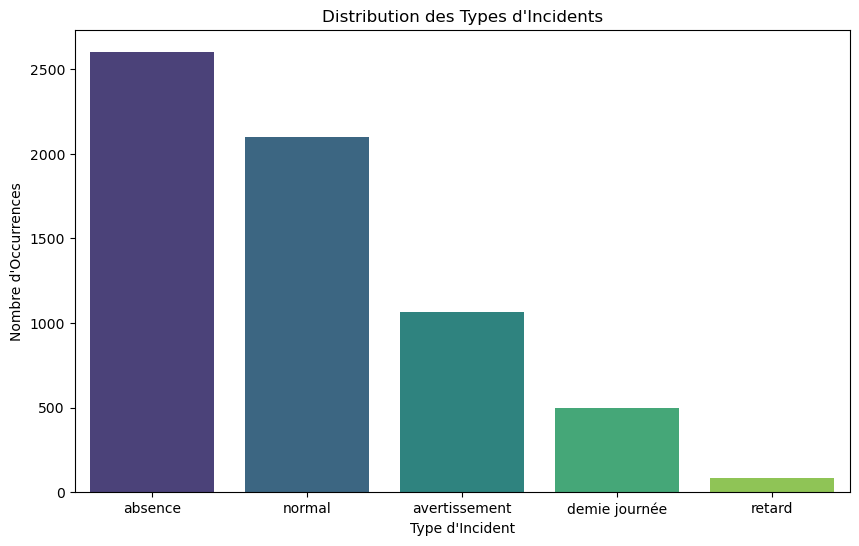

In [16]:
   type_counts = df['Type'].value_counts()

   # Visualiser la distribution
   plt.figure(figsize=(10, 6))
   sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
   plt.title("Distribution des Types d'Incidents")
   plt.xlabel("Type d'Incident")
   plt.ylabel("Nombre d'Occurrences")
   plt.show()


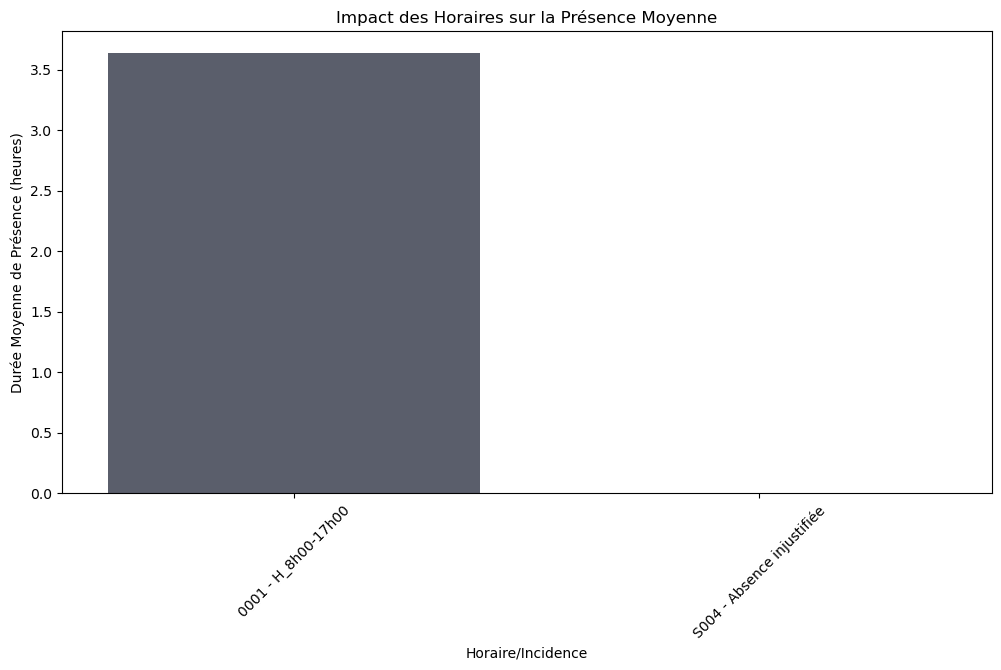

In [17]:
presence_by_schedule = df.groupby('Horaire/Incidence')['Total présence'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=presence_by_schedule.index, y=presence_by_schedule.values, palette="cividis")
plt.title("Impact des Horaires sur la Présence Moyenne")
plt.xlabel("Horaire/Incidence")
plt.ylabel("Durée Moyenne de Présence (heures)")
plt.xticks(rotation=45)
plt.show()


## Conclusion
Cette analyse détaillée du dataset de présence des employés permet de mettre en lumière plusieurs aspects importants :

- Les types d'incidents dominants, comme les retards ou les absences.
- L'évolution quotidienne de la présence des employés, qui peut montrer des tendances utiles pour ajuster les horaires de travail.
- Les employés les plus présents globalement et au sein de chaque direction, offrant un aperçu des comportements exemplaires.
- Les retards et les absences, analysés en détail pour cibler des jours ou des périodes spécifiques nécessitant des interventions.

Ces analyses peuvent guider des décisions managériales éclairées, comme l'ajustement des horaires, la mise en place de mesures incitatives, ou le renforcement des politiques de ponctualité.

Les visualisations proposées permettent de rendre les données accessibles à un public non technique, facilitant ainsi la compréhension et l'appropriation des résultats.